# Element data with attenuation coefficients
(c) Anders Kaestner, 2024
License: CC BY-NC-ND 4.0
    
Cite with: https://doi.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
%matplotlib inline

## Load data

In [2]:
elementdata = pd.read_excel('Attenuation_coefficients_chemical_elements.xlsx',sheet_name='data')

## Prune data for NaNs

In [3]:
elementdata = elementdata[np.isfinite(elementdata['Total xs (JEF14)'])]
elementdata = elementdata[elementdata['Total xs (JEF14)']!=0.0]
elementdata = elementdata[np.isfinite(elementdata['X-ray 150kV'])]

In [4]:
elementdata

,Name,At. #,Symbol,BP (K),MP (K),Density,Density 2,Density 3,at. wt.,covalent radius,...,Coh b,Inc b,Coh xs,Inc xs,Scatt xs,Abs xs,Total xs (JEF14),Ratio abs/scatt,X-ray 150kV,N/X
1,hydrogen,1,H,20.280,13.81,0.0899,0.070,0.070800,1.00797,0.32,...,-3.739,0.00,1.7568,80.2600,82.020,0.33260,30.620000,0.004055,0.180520,19.296932
2,helium,2,He,4.216,0.95,0.1785,0.169,0.124901,4.00260,0.93,...,3.260,0.00,1.3400,0.0000,1.340,0.00747,0.854300,0.005575,0.016065,1.576205
3,lithium,3,Li,1615.000,453.70,0.5300,0.530,0.534000,6.94100,1.23,...,-1.900,0.00,0.4540,0.9200,1.370,70.50000,71.673275,51.459854,0.062579,53.209462
4,beryllium,4,Be,3243.000,1560.00,1.8500,1.850,1.850000,9.01218,0.90,...,7.790,0.12,7.6300,0.0018,7.630,0.00760,6.345000,0.000996,0.221890,4.255119
5,boron,5,B,4275.000,2365.00,2.3400,2.340,2.370000,10.81100,0.82,...,5.300,0.00,3.5400,1.7000,5.240,767.00000,769.415070,146.374046,0.292030,349.106500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,thallium,81,Tl,1746.000,577.00,11.8500,11.850,11.800000,204.38300,1.48,...,8.776,0.00,9.6780,0.2100,9.890,3.43000,3.320000,0.346815,23.104000,0.020045
82,lead,82,Pb,2023.000,600.65,11.3500,11.350,11.342000,207.20000,1.47,...,9.405,0.00,11.1150,0.0030,11.118,0.17100,11.410000,0.015380,22.843000,0.016291
83,bismuth,83,Bi,1837.000,544.59,9.7500,9.750,9.807000,208.98040,1.46,...,8.532,0.00,9.1480,0.0084,9.156,0.03380,9.411000,0.003692,20.404000,0.012728
90,thorium,90,Th,5060.000,2028.00,11.7200,11.720,11.720000,232.03810,1.65,...,10.310,0.00,13.3600,0.0000,13.360,7.37000,19.260000,0.551647,28.821000,0.021878


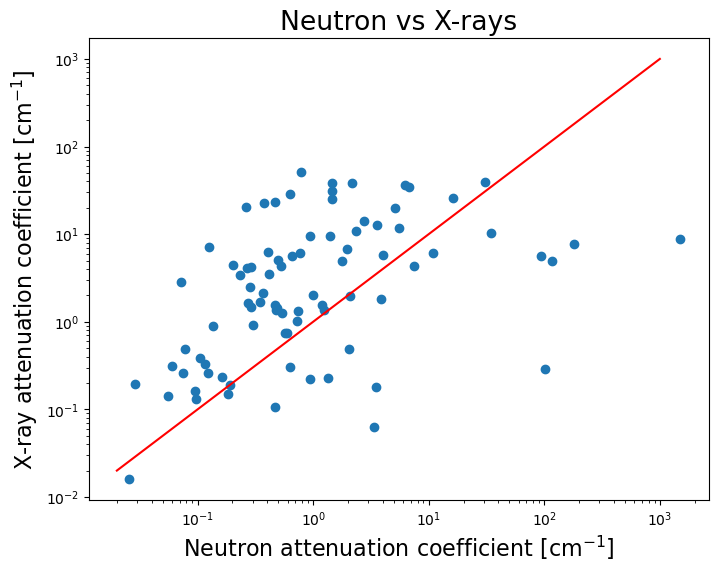

In [5]:
plt.figure(figsize=[8,6])
plt.scatter(elementdata['Attenuation coef [1/cm] (Sears)'],elementdata['X-ray 150kV'])
#plt.xlim(xmin=0,xmax=100)
fs=16
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Neutron attenuation coefficient [cm$^{-1}$]',fontsize=fs)
plt.ylabel('X-ray attenuation coefficient [cm$^{-1}$]',fontsize=fs)
plt.title('Neutron vs X-rays',fontsize=1.2*fs)
plt.plot([0.02,1000],[0.02,1000],'r')
plt.savefig('AttenuationNXPlot.png',dpi=1200)

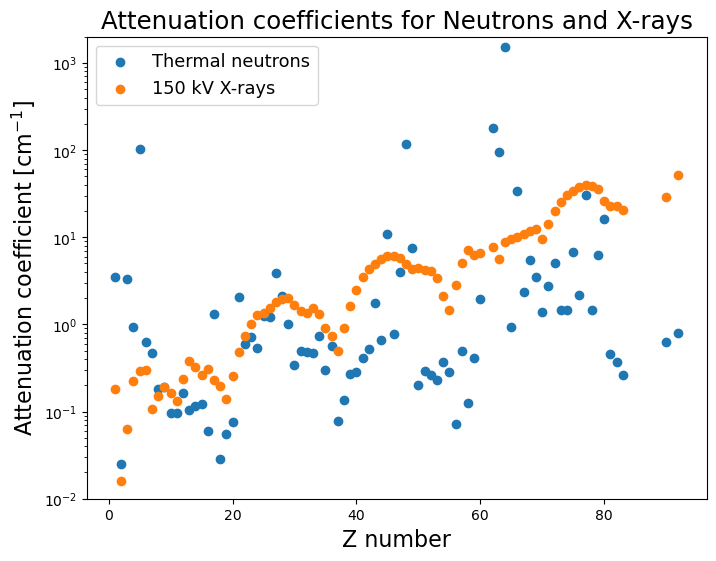

In [6]:
plt.figure(figsize=[8,6])
#col_selection='Density'
col_selection='At. #'
#col_selection='at. wt.'
xdata=np.floor(elementdata[col_selection])
plt.scatter(xdata, elementdata['Attenuation coef [1/cm] (Sears)'],label='Thermal neutrons')
plt.scatter(xdata, elementdata['X-ray 150kV'],label='150 kV X-rays')

plt.yscale('log')
plt.ylim(ymin=0.01,ymax=2000)
fs=16
plt.xlabel('Z number',fontsize=fs)
plt.ylabel('Attenuation coefficient [cm$^{-1}$]',fontsize=fs)
plt.title('Attenuation coefficients for Neutrons and X-rays',fontsize=1.1*fs)
plt.legend(fontsize=0.8*fs)
plt.savefig('AttenuationZPlot.pdf',dpi=1200)

# Render periodic systems

In [7]:
def drawElementBox(name,value,group,period,ax) :
    props = dict(boxstyle='square', facecolor=[value,value,value])
    if value<0.7:
        color = [1,1,1]
    else :
        color = [0,0,0]
        
    ax.text(period,group, name, 
        transform=ax.transAxes, 
        fontsize=14, color=color,
        verticalalignment='top',horizontalalignment='center', 
        bbox=props);

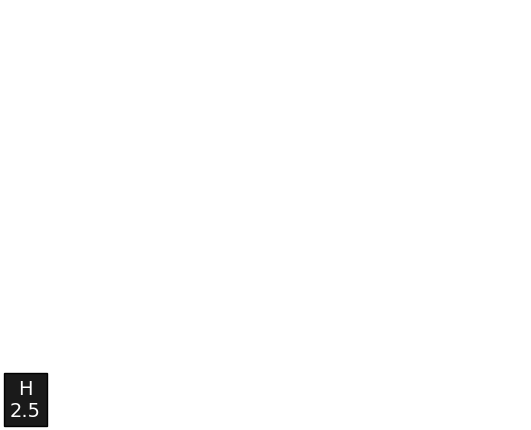

In [8]:
fig, ax = plt.subplots()

ax.axis('off')
drawElementBox('H\n2.5',0.1,0,0,ax)